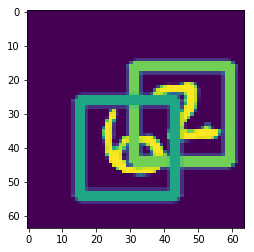

In [109]:
import numpy as np
from PIL import Image
import scipy.misc
from skimage.draw import line

# import keras
import keras

# import keras_retinanet
from keras_retinanet.models.resnet import custom_objects
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

train_data = np.load("/Users/haydenbarker/Desktop/MNISTDD_train+valid/train_X.npy")
test_data = np.load("/Users/haydenbarker/Desktop/MNISTDD_train+valid/valid_X.npy")

y_train = np.load("/Users/haydenbarker/Desktop/MNISTDD_train+valid/train_Y.npy")
bb_train = np.load("/Users/haydenbarker/Desktop/MNISTDD_train+valid/train_bboxes.npy")

y_test = np.load("/Users/haydenbarker/Desktop/MNISTDD_train+valid/valid_Y.npy")
bb_test = np.load("/Users/haydenbarker/Desktop/MNISTDD_train+valid/valid_bboxes.npy")

train_X = np.reshape(train_data,(55000,64,64))
test_X = np.reshape(test_data,(5000,64,64))

for i in range(55000):
    
    b1 = bb_train[i][0]
    b2 = bb_train[i][1]
    
    bb1 = np.array((b1[1], b1[0], b1[3], b1[2]))
    bb2 = np.array((b2[1], b2[0], b2[3], b2[2]))
    
    bb_train[i][0] = bb1
    bb_train[i][1] = bb2
    
for i in range(5000):

    b1 = bb_test[i][0]
    b2 = bb_test[i][1]
    
    bb1 = np.array((b1[1], b1[0], b1[3], b1[2]))
    bb2 = np.array((b2[1], b2[0], b2[3], b2[2]))
    
    bb_test[i][0] = bb1
    bb_test[i][1] = bb2

#image = np.transpose(test_X[1])
image = test_X[2]
draw = image.copy()
#draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

#color = label_color("1")
b = bb_test[2][0]

#b = [35,9,63,37]
e = bb_test[2][1]
#e = [23,31,51,59]
#b = np.array((b[1],b[0],b[3],b[2]))
#e = np.array((e[1],e[0],e[3],e[2]))
#print(e)
draw_box(draw, b, color = 200)
draw_box(draw, e, color = 150)
    
    #caption = "{} {:.3f}".format(labels_to_names[predicted_labels[index]], scores[index])
    #draw_caption(draw, b, caption)
draw_caption(draw, b, "")
draw_caption(draw, e, "")
#print(labels_to_names[predicted_labels[index]])
    
#plt.figure(figsize=(15, 15))
#plt.axis('off')
plt.imshow(draw)
plt.show()

#for i in range(55000):
    #scipy.misc.toimage(train_X[i], cmin=0.0, cmax=...).save('/Users/haydenbarker/Desktop/keras-retinanet-master/IMTrain/outfile' + str(i) + '.jpg')

#for n in range(5000):
    #scipy.misc.toimage(test_X[n], cmin=0.0, cmax=...).save('/Users/haydenbarker/Desktop/keras-retinanet-master/IMTest/outfile' + str(n) + '.jpg')

In [110]:
f = open('train.csv','w')
#f.write('hi there\n') #Give your csv text here.
## Python will convert \n to os.linesep


for i in range(55000):
    f.write('/Users/haydenbarker/Desktop/keras-retinanet-master/IMTrain/outfile' + str(i) + '.jpg')
    f.write(',')
    f.write(str(bb_train[i,0][0]))
    f.write(',')
    f.write(str(bb_train[i,0][1]))
    f.write(',')
    f.write(str(bb_train[i,0][2]))
    f.write(',')
    f.write(str(bb_train[i,0][3]))
    f.write(',')
    f.write(str(y_train[i][0]))
    f.write('\n')
    f.write('/Users/haydenbarker/Desktop/keras-retinanet-master/IMTrain/outfile' + str(i) + '.jpg')
    f.write(',')
    f.write(str(bb_train[i,1][0]))
    f.write(',')
    f.write(str(bb_train[i,1][1]))
    f.write(',')
    f.write(str(bb_train[i,1][2]))
    f.write(',')
    f.write(str(bb_train[i,1][3]))
    f.write(',')
    f.write(str(y_train[i][1]))
    f.write('\n')
f.close()

m = open('test.csv','w')

for n in range(5000):
    m.write('/Users/haydenbarker/Desktop/keras-retinanet-master/IMTest/outfile' + str(n) + '.jpg')
    m.write(',')
    m.write(str(bb_test[n,0][0]))
    m.write(',')
    m.write(str(bb_test[n,0][1]))
    m.write(',')
    m.write(str(bb_test[n,0][2]))
    m.write(',')
    m.write(str(bb_test[n,0][3]))
    m.write(',')
    m.write(str(y_test[n][0]))
    m.write('\n')
    m.write('/Users/haydenbarker/Desktop/keras-retinanet-master/IMTest/outfile' + str(n) + '.jpg')
    m.write(',')
    m.write(str(bb_test[n,1][0]))
    m.write(',')
    m.write(str(bb_test[n,1][1]))
    m.write(',')
    m.write(str(bb_test[n,1][2]))
    m.write(',')
    m.write(str(bb_test[n,1][3]))
    m.write(',')
    m.write(str(y_test[n][1]))
    m.write('\n')
m.close()

In [33]:
import h5py
from keras.models import load_model
import keras
import keras_retinanet.models.resnet
#model = load_model("/Users/haydenbarker/Desktop/keras-retinanet-master/snapshots/resnet50_csv_01.h5")
model = keras.models.load_model("/Users/haydenbarker/Desktop/keras-retinanet-master/snapshots/resnet50_csv_01.h5", custom_objects = keras_retinanet.models.resnet.custom_objects)
model.compile(loss='binary_crossentropy', optimizer='adam')
score = model.predict(test_X)
print ("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/models.py:274: UserWarning: Output "nms" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "nms" during training.
  sample_weight_mode=sample_weight_mode)


ValueError: Error when checking : expected input_1 to have 4 dimensions, but got array with shape (5000, 64, 64)